<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

    Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
    Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.metrics import r2_score

In [20]:
df = pd.read_csv('/datasets/insurance.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [22]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [23]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [24]:
df.corr(method='spearman')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000134,0.011823,-0.006578,-0.000172
Возраст,0.000134,1.000000,-0.020238,-0.001503,0.548589
Зарплата,0.011823,-0.020238,1.000000,-0.025492,-0.005549
Члены семьи,-0.006578,-0.001503,-0.025492,1.000000,-0.029210
Страховые выплаты,-0.000172,0.548589,-0.005549,-0.029210,1.000000


Сильной мультиколлинеарности между факторами нет

In [25]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [26]:
df_hist = df[['Возраст', 'Зарплата']]

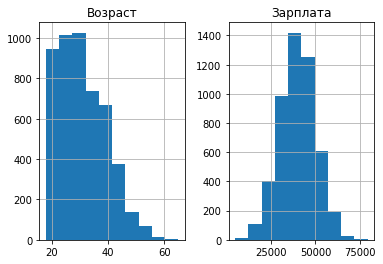

In [27]:
df_hist.hist();

In [28]:
df_diag = df[['Члены семьи', 'Страховые выплаты']]

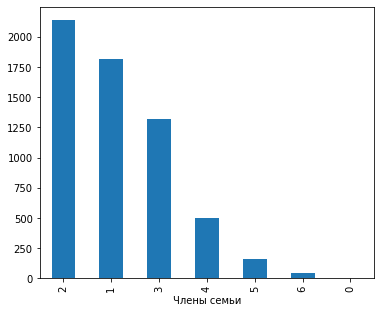

In [29]:
data = df.groupby('Члены семьи')['Члены семьи'].sum()
data = data.sort_values(ascending=False)
data.plot(kind ='bar', figsize=(6,5));

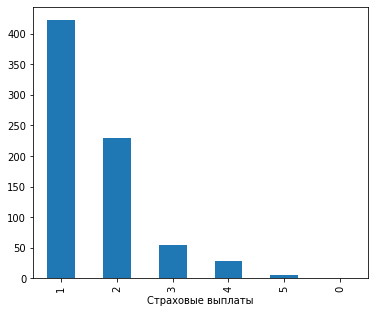

In [30]:
data = df.groupby('Страховые выплаты')['Страховые выплаты'].sum()
data = data.sort_values(ascending=False)
data.plot(kind ='bar', figsize=(6,5));

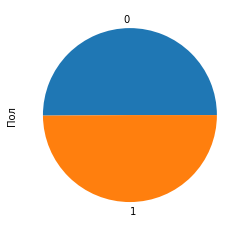

In [31]:
data = df.groupby('Пол')['Пол'].count()
data = data.sort_values(ascending=False)
data.plot(kind ='pie', figsize=(5,4));

## Умножение матриц

**Вопос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет, не изменится

**Обоснование:**

$$
a = Xw
$$

$$
w = (X^T X)^{-1} X^T y
$$

Делаем замену:

$$
Z = XP
$$
где Р - обратимая матрица

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$

$$w'=(P^T(X^TX)P)^{-1}(PX)^Ty$$
$$w'=P^{-1}(X^TX)^{-1}(P^T)^{-1}(P^TX^T)y$$
$$w'=P^{-1}(X^TX)^{-1}E(X^T)y$$
$$w'=P^{-1}(X^TX)^{-1}(X^T)y$$
$$w'=P^{-1}(X^TX)^{-1}(X^T)y$$
$$(P^{-1})w$$

результат предсказания а

$$a = Xw$$
$$a' = Zw' = XPP^{-1}w$$
$$a' = XPP^{-1}w$$
$$XEw = Xw = a$$
$$a' = P^{-1}(X^TX)^{-1}(X^T)y = (P^{-1})w$$
$$a' = (P)^{-1}w$$

Таким образом, получаем, что А = А1 => качество линейной регресии не изменится при умножении признаков на обратимую матрицу

## Алгоритм преобразования

1. Создадим матрицу и проверим ее на обратимость.
2. Преобразуем данные, перемножив матрицы.
3. Обучим модель лин.регресии на данных до и после преобразования для сравнения.

Обоснования этого алгоритма представлены выше.

## Проверка алгоритма

In [130]:
features = df.drop('Страховые выплаты', axis = 1)
target = df['Страховые выплаты']

In [131]:
print(features.shape)
print(target.shape)

(5000, 4)
(5000,)


In [132]:
print(features)

      Пол  Возраст  Зарплата  Члены семьи
0       1     41.0   49600.0            1
1       0     46.0   38000.0            1
2       0     29.0   21000.0            0
3       0     21.0   41700.0            2
4       1     28.0   26100.0            0
...   ...      ...       ...          ...
4995    0     28.0   35700.0            2
4996    0     34.0   52400.0            1
4997    0     20.0   33900.0            2
4998    1     22.0   32700.0            3
4999    1     28.0   40600.0            1

[5000 rows x 4 columns]


Проверима матрицу на обратимость:

In [133]:
matrix = np.random.normal(size = (4, 4))

In [134]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[ -0.3692919 ,   5.13538503,   7.34065126,  -2.06224738],
       [ -0.28217131,  -1.41633844,  -0.92699614,   0.04260353],
       [ -0.56449774,   4.83365122,   5.68638977,  -2.07363209],
       [  1.49017883,  -6.90123954, -11.00716332,   2.2763314 ]])

Перемножим матрицы:

In [135]:
main_matrix = features.values
result_matrix = main_matrix @ matrix
features_res = pd.DataFrame (result_matrix, columns = features.columns)
print(features_res)

               Пол       Возраст      Зарплата  Члены семьи
0     26777.761197   9794.415475 -29287.754084 -2603.283273
1     20503.523025   7492.159629 -22429.437112 -1996.746309
2     11328.712573   4138.220767 -12392.914392 -1103.547549
3     22520.129289   8244.067353 -24630.335327 -2188.346750
4     14087.304160   5149.253303 -15408.069975 -1369.984436
...            ...           ...           ...          ...
4995  19272.587148   7049.531808 -21080.951304 -1874.783987
4996  28294.243086  10355.218069 -30945.273487 -2749.842244
4997  18305.438855   6699.223514 -20021.786374 -1779.567746
4998  17656.561417   6458.249214 -19313.062721 -1716.856021
4999  21923.001174   8021.347869 -23976.824735 -2130.269407

[5000 rows x 4 columns]


Создадим класс для рассчета линейной регрессии:

In [136]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis = 1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Теперь сравним показатель качества линейной регресии до и после преобразования

In [137]:
model = LinearRegression()
model.fit(features, target)
prediction = model.predict(features)

In [138]:
print(r2_score(target, prediction))

0.42494550286668


In [139]:
model = LinearRegression()
model.fit(features_res, target)
prediction = model.predict(features_res)

In [140]:
print(r2_score(target, prediction))

0.4249455028665282


<b>Вывод:</b> качество линейной регресии при преобразовании (шифровании) не ухудшается

## Вывод

В самом начале данные были загружены и изучены. Пропуски отсутствовали, никаких "мешающих" закономерностей выявлено не было. Далее было проведено доказательство того, что при умножении признаков на обратимую матрицу показатель качества линейной регресии не меняется.

Эта информация была необходима, чтобы "зашифровать" данные, что и было выполнено. Также было повторно проверено, что качество линейной регрессии на данных до и после преобразования - одинаково. Данные можно зашифровывать таким образом и качество модели не пострадает.